In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

In [2]:
# Read data from CSV file
df = pd.read_csv("C:/Users/trant/OneDrive/Tài liệu/Đồ án Phân tích dữ liệu/DATASET/SHB.VN-1.csv")

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

# Select the Close column as the dependent variable
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [4]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

# Split the data into training and test 
train_size = int(0.7 * len(data_scaled))
test_size = len(data_scaled) - train_size

train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [5]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

# Find the best ARIMA model using auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4837.346, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4804.962, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4835.573, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4834.974, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4806.820, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4831.702, Time=0.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4831.707, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-4830.698, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4834.718, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4833.743, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4835.714, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4832.700, Time=0.40 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-4828.294, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-4839.183, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [6]:
# Preparing test data
x_test = np.arange(train_size, train_size + test_size).reshape(-1, 1)
y_test = test_data.reshape(-1)
y_pred_test = model.predict(n_periods=len(y_test))

# Evaluate the accuracy of the test set
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_test = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred_test)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSLE on Test dataset: {test_msle}")

MAPE on Test dataset: 0.2390646486008016
RMSE on Test dataset: 2996.216314012555
MSLE on Test dataset: 0.09903326392483792


In [7]:
# Predict the closing prices for the next 30, 60, and 90 days
last_index = df_Close.index[-1]

y_next_30_days = model.predict(n_periods=30)
y_next_60_days = model.predict(n_periods=60)
y_next_90_days = model.predict(n_periods=90)

y_next_30_days = scaler.inverse_transform(y_next_30_days.reshape(-1, 1))
y_next_60_days = scaler.inverse_transform(y_next_60_days[:30].reshape(-1, 1)) # Taking only the first 30 days
y_next_90_days = scaler.inverse_transform(y_next_90_days[:30].reshape(-1, 1)) # Taking only the first 30 days

# Print the predicted closing prices
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days.flatten())

print('Predicted closing prices for the next 60 days:')
print(y_next_60_days.flatten())

print('Predicted closing prices for the next 90 days:')
print(y_next_90_days.flatten())

# Calculate accuracy metrics for the next 30, 60, and 90 days predictions
def calculate_accuracy(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    msle = mean_squared_log_error(y_true, y_pred)
    return mape, rmse, msle

Predicted closing prices for the next 30 days:
[7568.00516605 7602.60072504 7665.09978282 7722.95078072 7764.63166261
 7789.66949612 7802.0113563  7806.34573592 7806.48603538 7804.95830197
 7803.16024708 7801.70325104 7800.74073032 7800.20968481 7799.97847839
 7799.92142307 7799.94634613 7799.99700564 7800.04511212 7800.08028314
 7800.10168664 7800.11241604 7800.11632556 7800.11660891 7800.11540988
 7800.11393122 7800.11271072 7800.1118937  7800.11143661 7800.11123314]
Predicted closing prices for the next 60 days:
[7568.00516605 7602.60072504 7665.09978282 7722.95078072 7764.63166261
 7789.66949612 7802.0113563  7806.34573592 7806.48603538 7804.95830197
 7803.16024708 7801.70325104 7800.74073032 7800.20968481 7799.97847839
 7799.92142307 7799.94634613 7799.99700564 7800.04511212 7800.08028314
 7800.10168664 7800.11241604 7800.11632556 7800.11660891 7800.11540988
 7800.11393122 7800.11271072 7800.1118937  7800.11143661 7800.11123314]
Predicted closing prices for the next 90 days:
[7568

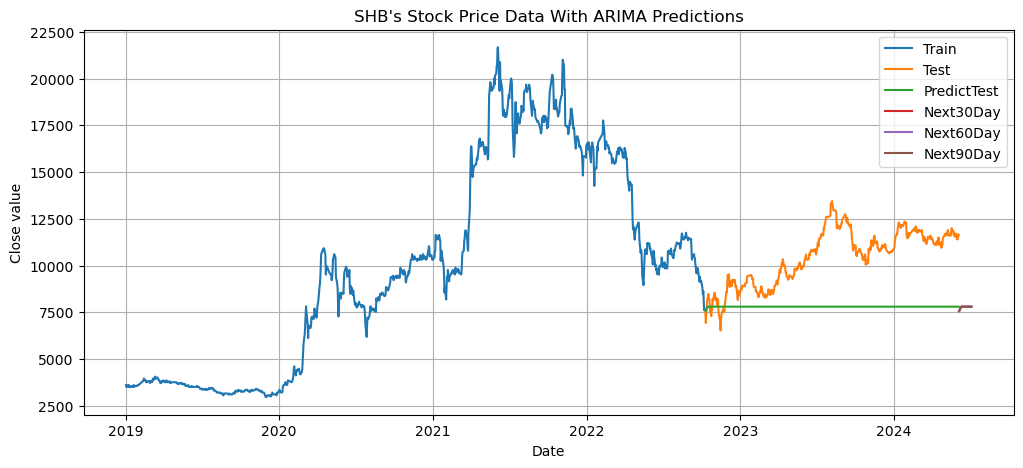

In [8]:
# Create a list of indices starting from the next date for 30, 60, and 90 days
last_date = df.index[-1]
next_date = last_date + pd.DateOffset(days=1)

index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

# Drawing
plt.figure(figsize=(12, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(train_data.reshape(-1, 1)), label='Train')
plt.plot(df.index[train_size:], y_test, label='Test')
plt.plot(df.index[train_size:], y_pred_test, label='PredictTest')
plt.plot(index_next_30_days, y_next_30_days, label='Next30Day')
plt.plot(index_next_60_days[:30], y_next_60_days, label='Next60Day') # Taking only the first 30 days
plt.plot(index_next_90_days[:30], y_next_90_days, label='Next90Day') # Taking only the first 30 days

plt.legend()
plt.grid()
plt.title(f"SHB's Stock Price Data With ARIMA Predictions")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.show()
